In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
stock_price_df = pd.read_csv('/content/stock (4).csv')
stock_vol_df = pd.read_csv("/content/stock_volume (1).csv")
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])

In [ ]:
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [ ]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df


,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [ ]:
def trading_window(data):

  n = 1
  data['Target'] = data[['Close']].shift(-n)

  return data

In [ ]:
!pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: Could not build wheels for TA-Lib, which is required to install pyproject.toml-based projects


In [ ]:
price_volume_df['3day MA'] = price_volume_df['Close'].shift(1).rolling(window = 3).mean()
price_volume_df['10day MA'] = price_volume_df['Close'].shift(1).rolling(window = 10).mean()
price_volume_df['30day MA'] = price_volume_df['Close'].shift(1).rolling(window = 30).mean()
price_volume_df['Std_dev']= price_volume_df['Close'].rolling(5).std()
#price_volume_target_df['RSI'] = talib.RSI(price_volume_target_df['Close'].values, timeperiod = 9)



In [ ]:
price_volume_df.dropna(inplace = True)
price_volume_df

,Date,Close,Volume,3day MA,10day MA,30day MA,Std_dev
30,2012-02-27,75.108574,136895500,73.897141,72.488143,66.603571,0.767920
31,2012-02-28,76.487144,150096800,74.502856,72.950143,67.100571,1.245556
32,2012-02-29,77.491432,238002800,75.408572,73.418857,67.651048,1.486880
33,2012-03-01,77.781425,170817500,76.362383,73.890000,68.211714,1.401567
34,2012-03-02,77.882858,107928100,77.253334,74.558572,68.761047,1.168303
...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,30498000,433.150004,394.755002,381.862666,23.205176
2155,2020-08-06,455.609985,50607200,438.220001,399.871002,384.319999,10.988566
2156,2020-08-07,444.450012,49453300,444.839996,408.294000,387.504999,7.746921
2157,2020-08-10,450.910004,53100900,446.769999,415.693002,390.158666,7.172823


In [ ]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df = price_volume_target_df[:-1]


In [ ]:
price_volume_target_df

,Date,Close,Volume,3day MA,10day MA,30day MA,Std_dev,Target
30,2012-02-27,75.108574,136895500,73.897141,72.488143,66.603571,0.767920,76.487144
31,2012-02-28,76.487144,150096800,74.502856,72.950143,67.100571,1.245556,77.491432
32,2012-02-29,77.491432,238002800,75.408572,73.418857,67.651048,1.486880,77.781425
33,2012-03-01,77.781425,170817500,76.362383,73.890000,68.211714,1.401567,77.882858
34,2012-03-02,77.882858,107928100,77.253334,74.558572,68.761047,1.168303,76.165718
...,...,...,...,...,...,...,...,...
2153,2020-08-04,438.660004,43267900,415.183340,389.689002,379.202999,28.270316,440.250000
2154,2020-08-05,440.250000,30498000,433.150004,394.755002,381.862666,23.205176,455.609985
2155,2020-08-06,455.609985,50607200,438.220001,399.871002,384.319999,10.988566,444.450012
2156,2020-08-07,444.450012,49453300,444.839996,408.294000,387.504999,7.746921,450.910004


In [ ]:
y = price_volume_target_df['Target']
X = price_volume_target_df.iloc[:,:7]


In [ ]:
X

,Date,Close,Volume,3day MA,10day MA,30day MA,Std_dev
30,2012-02-27,75.108574,136895500,73.897141,72.488143,66.603571,0.767920
31,2012-02-28,76.487144,150096800,74.502856,72.950143,67.100571,1.245556
32,2012-02-29,77.491432,238002800,75.408572,73.418857,67.651048,1.486880
33,2012-03-01,77.781425,170817500,76.362383,73.890000,68.211714,1.401567
34,2012-03-02,77.882858,107928100,77.253334,74.558572,68.761047,1.168303
...,...,...,...,...,...,...,...
2153,2020-08-04,438.660004,43267900,415.183340,389.689002,379.202999,28.270316
2154,2020-08-05,440.250000,30498000,433.150004,394.755002,381.862666,23.205176
2155,2020-08-06,455.609985,50607200,438.220001,399.871002,384.319999,10.988566
2156,2020-08-07,444.450012,49453300,444.839996,408.294000,387.504999,7.746921


In [ ]:
split = int(0.80 * len(X))
X_train_df = X[:split]
y_train_df = y[:split].tolist()
X_test_df = X[split:]
y_test_df = y[split:].tolist()
X_train_df.shape


(1702, 7)

In [ ]:
X_test_df

,Date,Close,Volume,3day MA,10day MA,30day MA,Std_dev
1732,2018-11-29,179.550003,41770000,176.600001,181.345000,201.777000,3.715991
1733,2018-11-30,178.580002,39531500,178.243337,180.620000,200.389000,3.003646
1734,2018-12-03,184.820007,40802500,179.690002,179.336999,199.141000,3.834486
1735,2018-12-04,176.690002,41344300,180.983337,178.466000,197.991333,3.050564
1736,2018-12-06,174.720001,43098400,180.030004,177.549000,196.526000,3.805389
...,...,...,...,...,...,...,...
2153,2020-08-04,438.660004,43267900,415.183340,389.689002,379.202999,28.270316
2154,2020-08-05,440.250000,30498000,433.150004,394.755002,381.862666,23.205176
2155,2020-08-06,455.609985,50607200,438.220001,399.871002,384.319999,10.988566
2156,2020-08-07,444.450012,49453300,444.839996,408.294000,387.504999,7.746921


In [ ]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)


SEQUENCE_SIZE = 8
x_train,y_train = to_sequences(SEQUENCE_SIZE,y_train_df)
x_test,y_test = to_sequences(SEQUENCE_SIZE,y_test_df)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))
x_test

Shape of training set: (1694, 8, 1)
Shape of test set: (418, 8, 1)


array([[[178.580002],
        [184.820007],
        [176.690002],
        ...,
        [169.600006],
        [168.630005],
        [169.100006]],

       [[184.820007],
        [176.690002],
        [174.720001],
        ...,
        [168.630005],
        [169.100006],
        [170.949997]],

       [[176.690002],
        [174.720001],
        [168.490005],
        ...,
        [169.100006],
        [170.949997],
        [165.479996]],

       ...,

       [[373.01001 ],
        [380.160004],
        [384.76001 ],
        ...,
        [438.660004],
        [440.25    ],
        [455.609985]],

       [[380.160004],
        [384.76001 ],
        [425.040009],
        ...,
        [440.25    ],
        [455.609985],
        [444.450012]],

       [[384.76001 ],
        [425.040009],
        [435.75    ],
        ...,
        [455.609985],
        [444.450012],
        [450.910004]]])

In [ ]:
y_test

array([170.949997, 165.479996, 163.940002, 166.070007, 160.889999,
       156.830002, 150.729996, 146.830002, 157.169998, 156.149994,
       156.229996, 157.740005, 157.919998, 142.190002, 148.259995,
       147.929993, 150.75    , 153.309998, 153.800003, 152.289993,
       150.      , 153.070007, 154.940002, 155.860001, 156.820007,
       153.300003, 153.919998, 152.699997, 157.759995, 156.300003,
       154.679993, 165.25    , 166.440002, 166.520004, 171.25    ,
       174.179993, 174.240005, 170.940002, 170.410004, 169.429993,
       170.889999, 170.179993, 170.800003, 170.419998, 170.929993,
       172.029999, 171.059998, 172.970001, 174.229996, 174.330002,
       174.869995, 173.149994, 174.970001, 175.850006, 175.529999,
       174.520004, 172.5     , 172.910004, 178.899994, 180.910004,
       181.710007, 183.729996, 186.119995, 188.020004, 186.529999,
       188.160004, 195.089996, 191.050003, 188.740005, 186.789993,
       188.470001, 188.720001, 189.949997, 191.240005, 194.020

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Epoch 1/25
22/22 [==============================] - 10s 161ms/step - loss: 20315.0664 - val_loss: 55950.2812
Epoch 2/25
22/22 [==============================] - 3s 135ms/step - loss: 15973.4023 - val_loss: 43966.4766
Epoch 3/25
22/22 [==============================] - 3s 150ms/step - loss: 12772.4248 - val_loss: 34096.4258
Epoch 4/25
22/22 [==============================] - 3s 148ms/step - loss: 9936.4688 - val_loss: 26087.1973
Epoch 5/25
22/22 [==============================] - 3s 125ms/step - loss: 7549.5322 - val_loss: 19914.2500
Epoch 6/25
22/22 [==============================] - 3s 132ms/step - loss: 6025.7554 - val_loss: 15039.2422
Epoch 7/25
22/22 [==============================] - 3s 152ms/step - loss: 4675.7803 - val_loss: 11098.3193
Epoch 8/25
22/22 [==============================] - 3s 139ms/step - loss: 3758.5344 - val_loss: 8030.1636
Epoch 9/25
22/22 [==============================] - 2s 70ms/step - loss: 2771.4019 - val_loss: 5732.7109
Epoch 10/25
22/22 [=================

196.87249755859375

In [ ]:
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

14/14 [==============================] - 0s 12ms/step
Score (RMSE): 14.031126181522087


In [ ]:
combined_set = np.concatenate((x_train, x_test), axis=0)
combined_set.shape

(2112, 8, 1)

In [ ]:
x_test

array([[[178.580002],
        [184.820007],
        [176.690002],
        ...,
        [169.600006],
        [168.630005],
        [169.100006]],

       [[184.820007],
        [176.690002],
        [174.720001],
        ...,
        [168.630005],
        [169.100006],
        [170.949997]],

       [[176.690002],
        [174.720001],
        [168.490005],
        ...,
        [169.100006],
        [170.949997],
        [165.479996]],

       ...,

       [[373.01001 ],
        [380.160004],
        [384.76001 ],
        ...,
        [438.660004],
        [440.25    ],
        [455.609985]],

       [[380.160004],
        [384.76001 ],
        [425.040009],
        ...,
        [440.25    ],
        [455.609985],
        [444.450012]],

       [[384.76001 ],
        [425.040009],
        [435.75    ],
        ...,
        [455.609985],
        [444.450012],
        [450.910004]]])

In [ ]:
pred = model.predict(x_test)


14/14 [==============================] - 0s 13ms/step


In [ ]:
test_predicted = []

for i in pred:
  test_predicted.append([i][0][0])
len(test_predicted)

418

In [ ]:
len(y[:split])

1702

In [ ]:
df_pred =price_volume_df[split+SEQUENCE_SIZE:][['Date']]
df_pred = df_pred[:-1]


In [ ]:
df_pred['prediction'] = test_predicted
df_pred

,Date,prediction
1740,2018-12-12,168.434891
1741,2018-12-13,166.796204
1742,2018-12-14,164.987274
1743,2018-12-17,162.301605
1744,2018-12-18,162.910599
...,...,...
2153,2020-08-04,391.291534
2154,2020-08-05,395.426849
2155,2020-08-06,407.832794
2156,2020-08-07,405.345306


In [ ]:
df_pred['target'] = y_test
df_pred

,Date,prediction,target
1740,2018-12-12,168.434891,170.949997
1741,2018-12-13,166.796204,165.479996
1742,2018-12-14,164.987274,163.940002
1743,2018-12-17,162.301605,166.070007
1744,2018-12-18,162.910599,160.889999
...,...,...,...
2153,2020-08-04,391.291534,440.250000
2154,2020-08-05,395.426849,455.609985
2155,2020-08-06,407.832794,444.450012
2156,2020-08-07,405.345306,450.910004


In [ ]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
interactive_plot(df_pred, "yash")

In [ ]:
df_pred

,Date,prediction,target
1740,2018-12-12,168.434891,170.949997
1741,2018-12-13,166.796204,165.479996
1742,2018-12-14,164.987274,163.940002
1743,2018-12-17,162.301605,166.070007
1744,2018-12-18,162.910599,160.889999
...,...,...,...
2153,2020-08-04,391.291534,440.250000
2154,2020-08-05,395.426849,455.609985
2155,2020-08-06,407.832794,444.450012
2156,2020-08-07,405.345306,450.910004


In [ ]:
price_volume_target_df

,Date,Close,Volume,3day MA,10day MA,30day MA,Std_dev,Target
30,2012-02-27,75.108574,136895500,73.897141,72.488143,66.603571,0.767920,76.487144
31,2012-02-28,76.487144,150096800,74.502856,72.950143,67.100571,1.245556,77.491432
32,2012-02-29,77.491432,238002800,75.408572,73.418857,67.651048,1.486880,77.781425
33,2012-03-01,77.781425,170817500,76.362383,73.890000,68.211714,1.401567,77.882858
34,2012-03-02,77.882858,107928100,77.253334,74.558572,68.761047,1.168303,76.165718
...,...,...,...,...,...,...,...,...
2153,2020-08-04,438.660004,43267900,415.183340,389.689002,379.202999,28.270316,440.250000
2154,2020-08-05,440.250000,30498000,433.150004,394.755002,381.862666,23.205176,455.609985
2155,2020-08-06,455.609985,50607200,438.220001,399.871002,384.319999,10.988566,444.450012
2156,2020-08-07,444.450012,49453300,444.839996,408.294000,387.504999,7.746921,450.910004


In [ ]:
!pip install statsmodels --upgrade

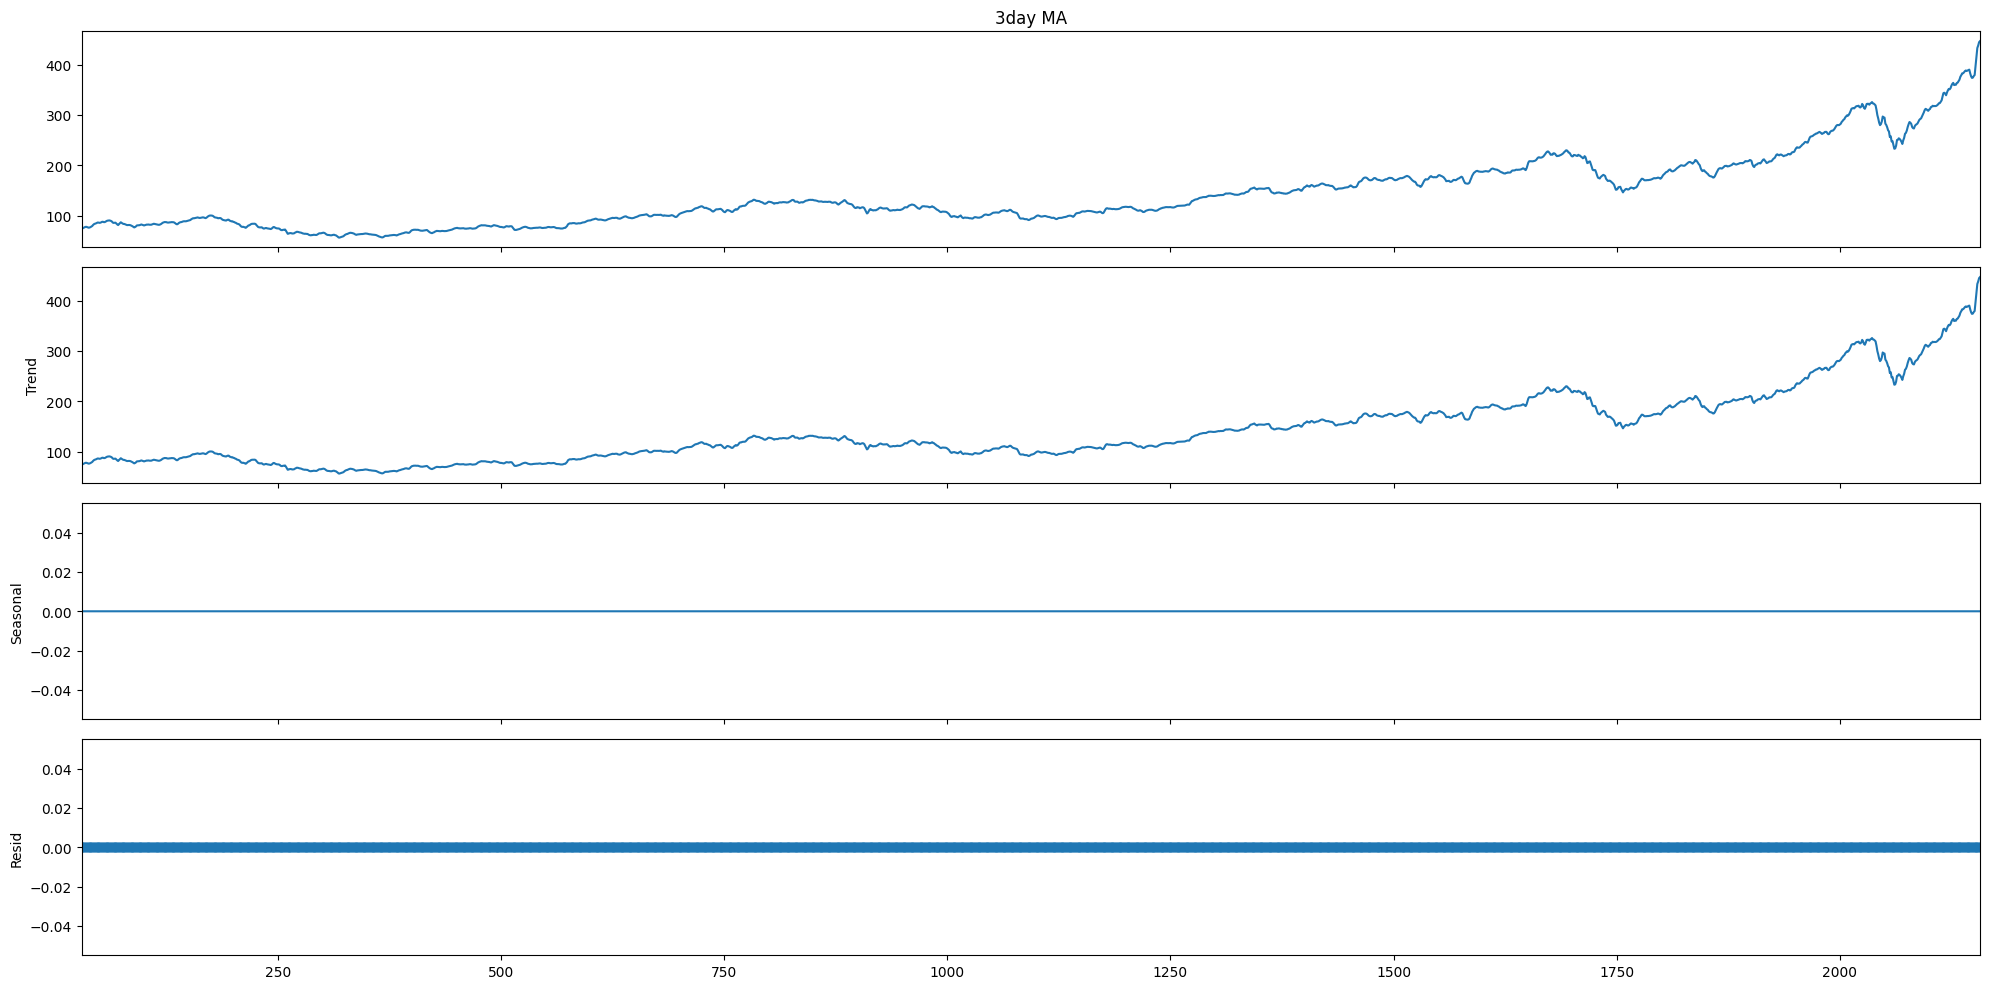

In [ ]:
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import plotly.graph_objects as go
import statsmodels.api as sm


plt.rcParams['figure.figsize'] = 20, 10

res = sm.tsa.seasonal_decompose(price_volume_target_df['3day MA'], model='additive',period=1) ## weekly seasonality
res.plot()
plt.show()


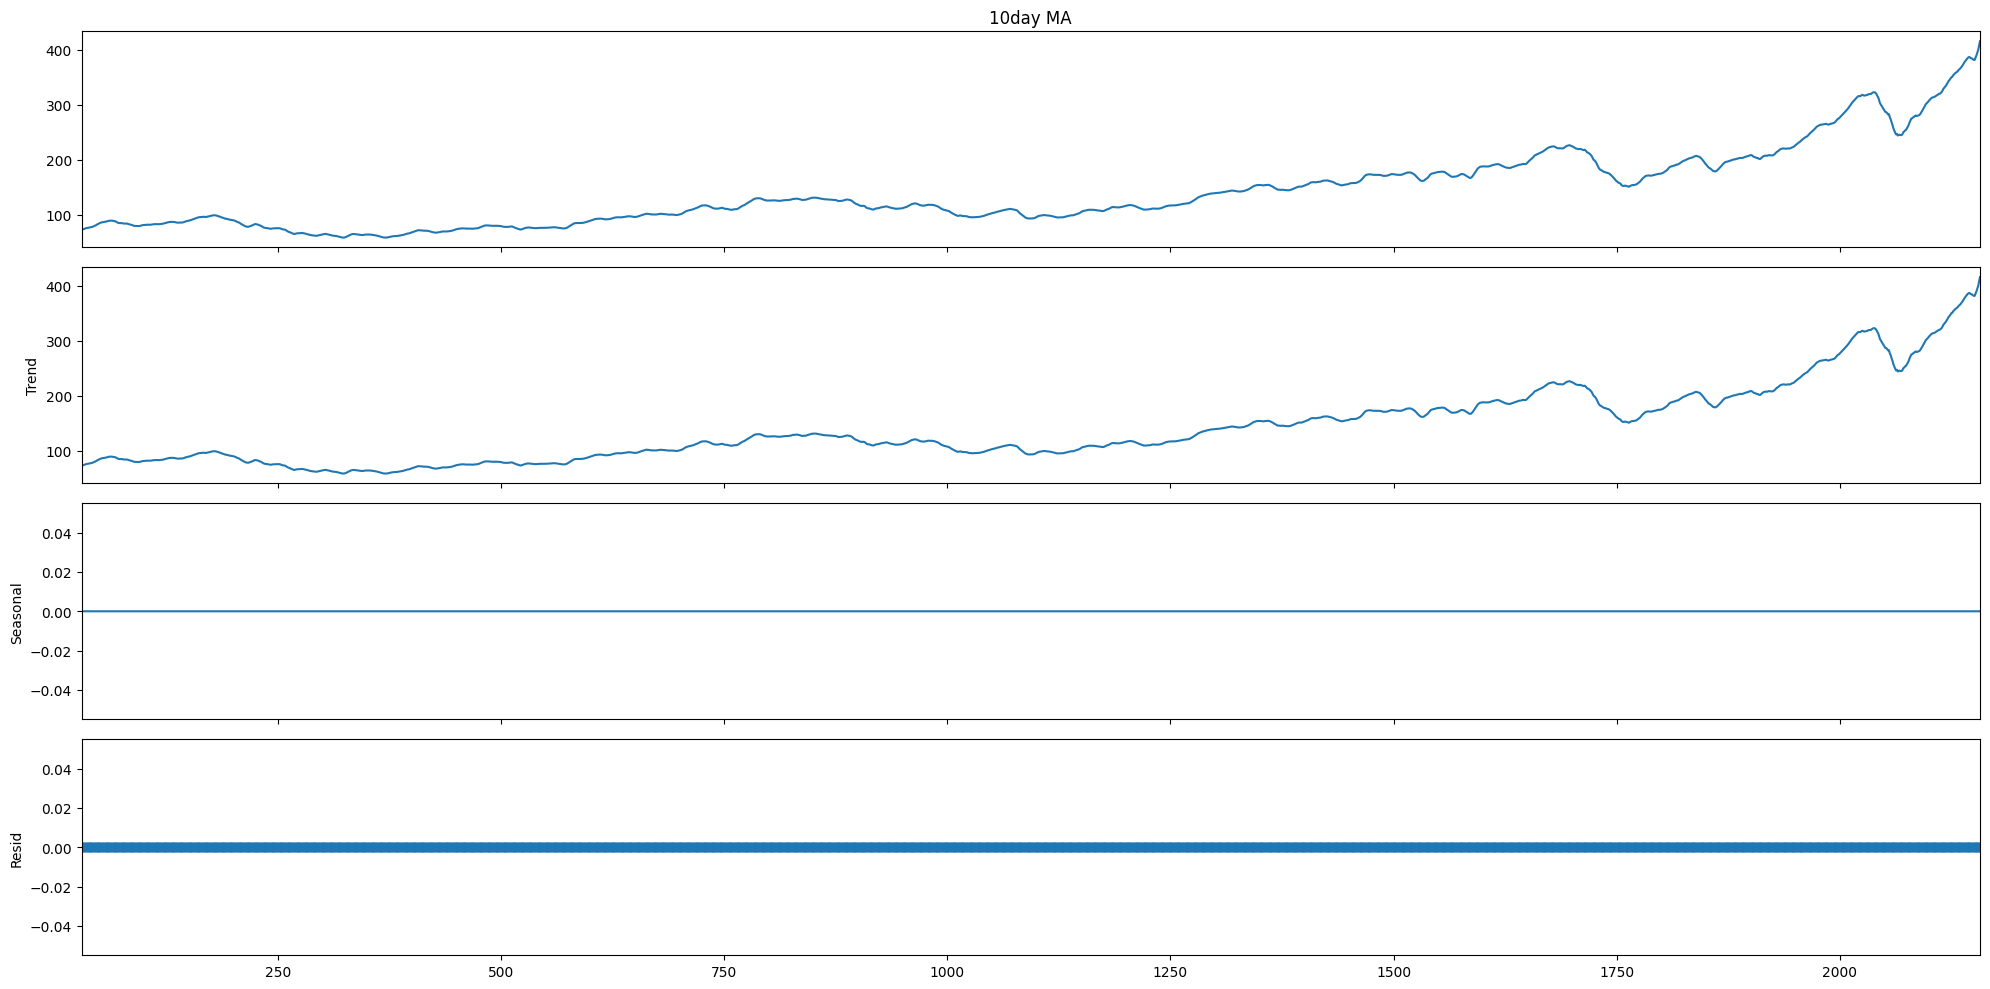

In [ ]:
plt.rcParams['figure.figsize'] = 20, 10

res = sm.tsa.seasonal_decompose(price_volume_target_df['10day MA'], model='additive',period=1) ## weekly seasonality
res.plot()
plt.show()

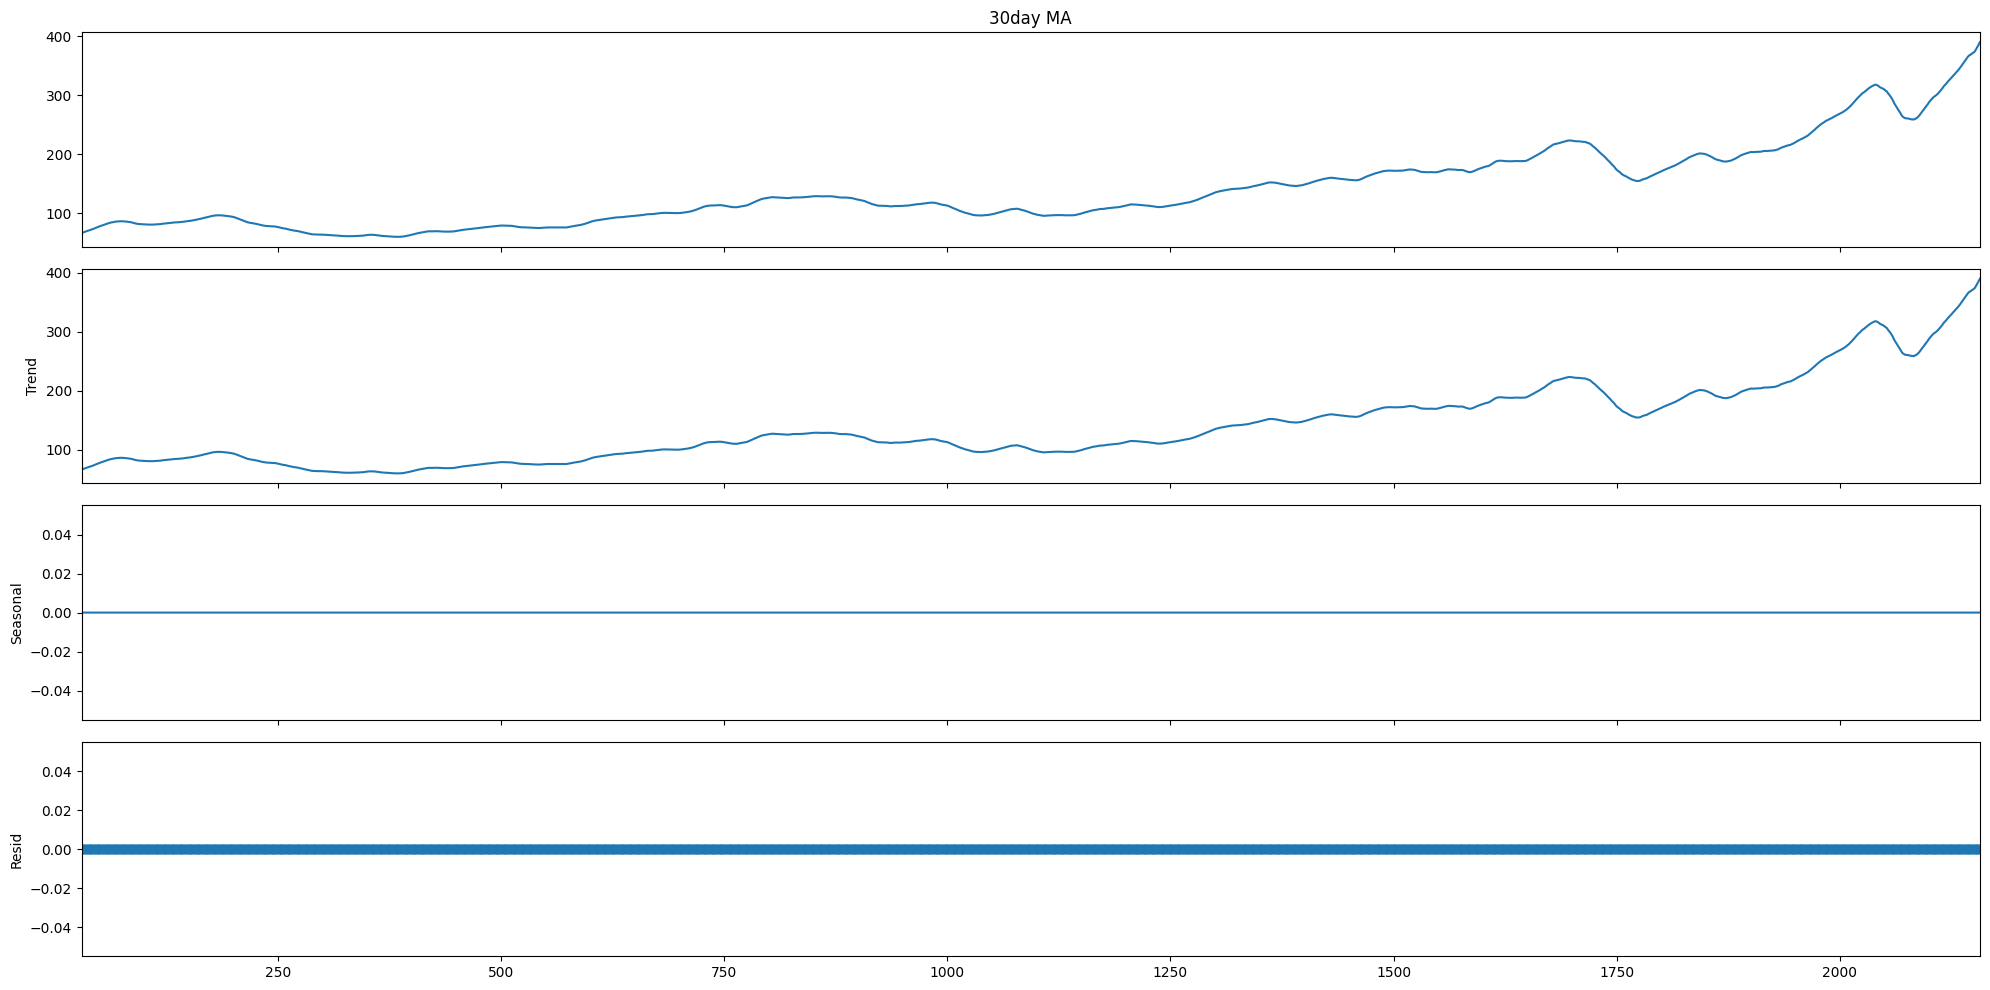

In [ ]:
plt.rcParams['figure.figsize'] = 20, 10

res = sm.tsa.seasonal_decompose(price_volume_target_df['30day MA'], model='additive',period=1) ## weekly seasonality
res.plot()
plt.show()

In [ ]:
def add_daily_change_column(df, col_name):
    df['Daily Returns'] = df[col_name].pct_change()
    return df


In [ ]:
def fit_variational_posterior(model, variational_posteriors, observed_time_series):
    elbo_loss = tfp.vi.fit_surrogate_posterior(
        target_log_prob_fn = model.joint_log_prob(observed_time_series = observed_time_series),
        surrogate_posterior = variational_posteriors,
        optimizer = tf.optimizers.Adam(learning_rate = 0.1),
        num_steps = 100,
        seed = SEED
    )
    return elbo_loss

In [ ]:
!pip install sklearn.bayesian_network

ERROR: Could not find a version that satisfies the requirement sklearn.bayesian_network (from versions: none)
ERROR: No matching distribution found for sklearn.bayesian_network


In [ ]:
import tensorflow_probability as tfp
def build_model(observed_time_series, lags, observation_noise_scale_prior):
    linear_trend = tfp.sts.LocalLinearTrend(
        observed_time_series = observed_time_series
    )

    dayofweek_season = tfp.sts.Seasonal(
        num_seasons = 10,
        num_steps_per_season = 1,
        observed_time_series = observed_time_series,
        constrain_mean_effect_to_zero = False,
        name = "10_season"
    )

    autoregressive = tfp.sts.Autoregressive(
        order = lags,
        observed_time_series = observed_time_series
    )

    model = tfp.sts.Sum(
        [dayofweek_season, linear_trend, autoregressive],
        observed_time_series = observed_time_series,
        observation_noise_scale_prior = observation_noise_scale_prior
    )
    return model


In [ ]:

def fit_variational_posterior(model, variational_posteriors, observed_time_series):
    elbo_loss = tfp.vi.fit_surrogate_posterior(
        target_log_prob_fn = model.joint_log_prob(observed_time_series = observed_time_series),
        surrogate_posterior = variational_posteriors,
        optimizer = tf.optimizers.Adam(learning_rate = 0.1),
        num_steps = 200,
        seed = SEED
    )
    return elbo_loss

## Plot ELBO curve
def plot_elbo_loss(elbo_loss):
    fig = go.Figure(data=go.Scatter(x = np.arange(len(elbo_loss)), y = elbo_loss))
    fig.update_layout(title_text='ELBO Plot')
    fig.update_xaxes(title_text='Number of Iterations')
    fig.update_yaxes(title_text='-ve ELBO')
    fig.show()


In [ ]:
import tensorflow_probability as tfp
import statsmodels.tsa.stattools as sts_tools
import plotly.graph_objects as go
import tensorflow as tf



def forecast(model, samples, observed_time_series, num_forecast_steps):
    forecast_dist = tfp.sts.forecast(
        model,
        observed_time_series = observed_time_series,
        parameter_samples = samples,
        num_steps_forecast = num_forecast_steps
    )
    forecast_mean = forecast_dist.mean().numpy().flatten()
    forecast_std = forecast_dist.stddev().numpy().flatten()
    return {'mean': forecast_mean, 'scale': forecast_std}


def forecast_onestep_prediction(model, samples, observed_time_series, num_forecast_steps):
    forecast_dist = tfp.sts.one_step_predictive(
        model,
        observed_time_series = observed_time_series,
        parameter_samples = samples
    )
    forecast_mean = forecast_dist.mean().numpy()[-num_forecast_steps:]
    forecast_std = forecast_dist.stddev().numpy()[-num_forecast_steps:]
    return {'mean': forecast_mean, 'scale': forecast_std}

## Plot Forecast
def plot_forecast(actual_dates, actual, forecast_dates, prediction, prediction_uncertainity, title='Forecast'):
    prediction_lb = prediction - 1.96*prediction_uncertainity
    prediction_ub = prediction + 1.96*prediction_uncertainity
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=actual_dates,
        y=actual,
        name='Ground Truth',
        mode='lines+markers',
        line_color='darkturquoise'
    ))
    fig.add_trace(go.Scatter(
        x=forecast_dates,
        y=prediction,
        name='Forecast',
        mode='lines+markers',
        line_color='orange'
    ))
    fig.add_trace(go.Scatter(
        x = forecast_dates,
        y = prediction_ub,
        fill = None,
        mode='lines',
        line_color='orange',
        showlegend=False,
        name='Forecast UB'
    ))
    fig.add_trace(go.Scatter(
        x = forecast_dates,
        y = prediction_lb,
        fill='tonexty',
        mode='lines',
        line_color='orange',
        showlegend=False,
        name='Forecast LB'
    ))
    fig.update_layout(title_text=title, xaxis_rangeslider_visible=True)
    fig.show()

## Extract inferred value of model Parameters
def extract_model_params(model, samples):
    model_params = {}
    for param in model.parameters:
        model_params[param.name] = {
            "point_estimate": np.mean(samples[param.name], axis=0),
            "uncertainity": np.std(samples[param.name], axis=0)
        }
    return pd.DataFrame.from_dict(model_params).T

In [ ]:
df_pred['prediction']

1740    168.434891
1741    166.796204
1742    164.987274
1743    162.301605
1744    162.910599
           ...    
2153    391.291534
2154    395.426849
2155    407.832794
2156    405.345306
2157    420.633423
Name: prediction, Length: 418, dtype: float32

In [ ]:
# 10 days
model_lag1 = build_model(df_pred['prediction'], 1, None)

In [ ]:
SEED = 684
variational_posteriors_lag1 = tfp.sts.build_factored_surrogate_posterior(model = model_lag1, seed = SEED)
elbo_loss_lag1 = fit_variational_posterior(model_lag1, variational_posteriors_lag1, df_pred['prediction'])

## Plot ELBO

plot_elbo_loss(elbo_loss_lag1)

Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`


In [ ]:
## samples for posterior
samples_lag1 = variational_posteriors_lag1.sample(10000)
#print(samples_lag1)
model_params = extract_model_params(model_lag1, samples_lag1)
#model_params

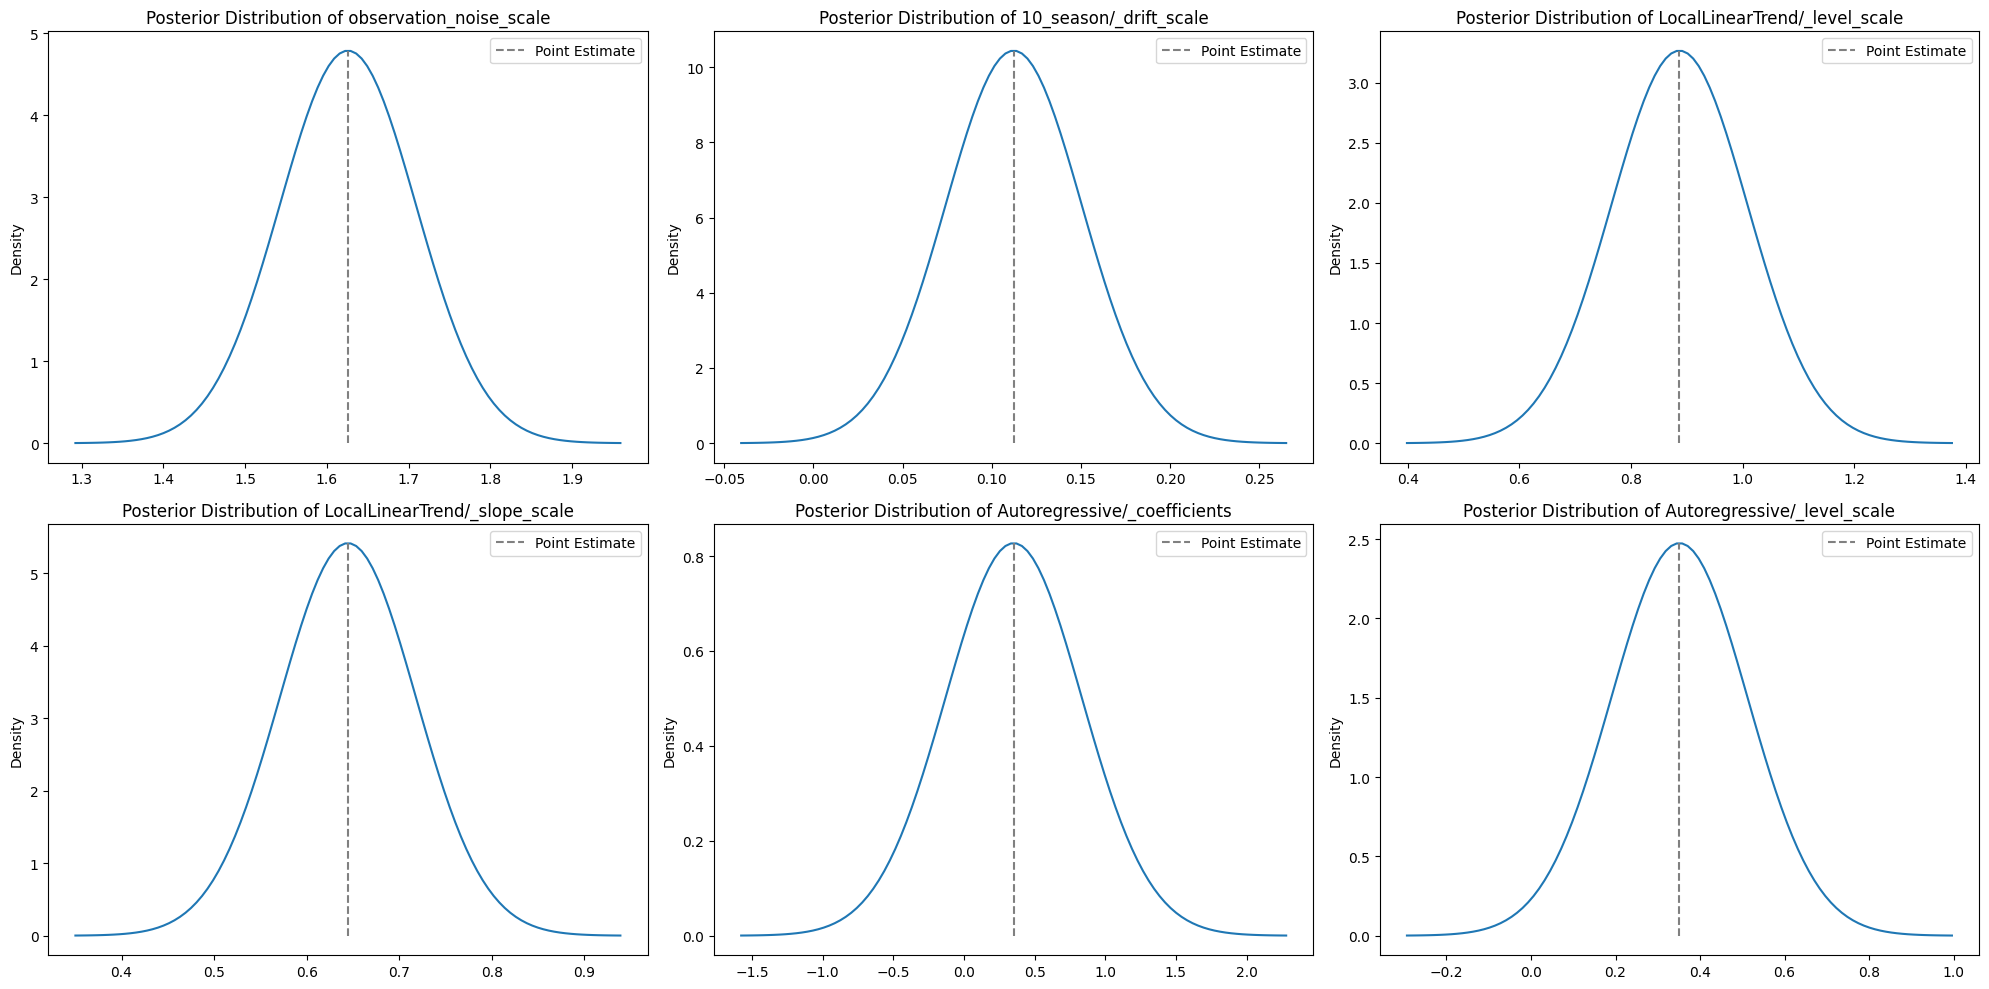

In [ ]:
from scipy.stats import norm

fig, axes = plt.subplots(2, 3)
for param, loc, scale, ax in zip(model_params.index, model_params['point_estimate'], model_params['uncertainity'], fig.axes):
    x = np.linspace(loc - 4*scale, loc + 4*scale, 100)
    y = norm.pdf(x, loc, scale)
    ax.plot(x, y)
    ax.vlines(loc, 0, max(y), linestyles = 'dashed', color = 'grey', label='Point Estimate')
    ax.set_title('Posterior Distribution of {}'.format(param))
    ax.set_ylabel('Density')
    ax.legend()
fig.tight_layout()

In [ ]:
samples_lag1 = variational_posteriors_lag1.sample(20000)

In [ ]:
model_lag1

In [ ]:

forecast_params_lag1 = forecast(model_lag1, samples_lag1, df_pred['prediction'], 10)

In [ ]:
interactive_plot(df_pred[-150:], "prediction")

In [ ]:
num_forecast_steps = 10
actual =  df_pred['target']
actual_dates = actual.index
forecast_dates = actual.index[-num_forecast_steps:]
plot_forecast(
    actual_dates, actual,
    forecast_dates, forecast_params_lag1['mean'], forecast_params_lag1['scale'],
    'Amazon Stock Closing Price Forecast for next 10 days'
)

In [ ]:
def forecast_onestep_prediction(model, samples, observed_time_series, num_forecast_steps):
    forecast_dist = tfp.sts.one_step_predictive(
        model,
        observed_time_series = observed_time_series,
        parameter_samples = samples
    )
    forecast_mean = forecast_dist.mean().numpy()[-num_forecast_steps:]
    forecast_std = forecast_dist.stddev().numpy()[-num_forecast_steps:]
    return {'mean': forecast_mean, 'scale': forecast_std}

In [ ]:
onestep_forecast_params_lag1 = forecast_onestep_prediction(model_lag1, samples_lag1, df_pred['prediction'], num_forecast_steps)

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


In [ ]:
one_step_forecast = pd.DataFrame(columns = ['Date', 'Actual Value','Forecast Estimate','Forecast Uncertainty'])
one_step_forecast['Date'] = actual[-num_forecast_steps:].index
one_step_forecast['Actual Value'] = actual[-num_forecast_steps:].values
one_step_forecast['Forecast Estimate'] = onestep_forecast_params_lag1['mean']
one_step_forecast['Forecast Uncertainty'] = onestep_forecast_params_lag1['scale']
one_step_forecast

In [ ]:
"""
ARIMA: Autoregressive Integrated Moving Average (ARIMA) is a widely used time series model that is well-suited for data that exhibits seasonality and autocorrelation.

SARIMA: Seasonal ARIMA (SARIMA) is an extension of ARIMA that explicitly models seasonal patterns in the data.

Exponential smoothing: Exponential smoothing is a simple and effective time series model that is often used for short-term forecasting.

NN-based models: Neural network-based models, such as recurrent neural networks (RNNs) and long short-term memory (LSTM) networks, can be very effective for time series forecasting. However, they can also be more difficult to train and interpret than traditional time series models.
"""

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers

# Load image data
image_data = tf.keras.preprocessing.image.load_img('/content/medical.jpg', target_size=(299, 299))
image_data = np.expand_dims(image_data, axis=0)
image_data = preprocess_input(image_data)

# Define BCNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(299, 299, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,

2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(3, activation='linear')
    ])
    return model

model = create_model()

# Build variational posterior
variational_posteriors = tfp.sts.build_factored_surrogate_posterior(
    event_shape=[299, 299, 3],
    bijector=tfp.bijectors.Reshape(event_shape_in=[299, 299, 3], event_shape_out=[-1]),
    dtype=tf.float32
)

# Fit variational posterior
elbo_loss = tfp.vi.fit_surrogate_posterior(
    target_log_prob_fn=model.joint_log_prob(
        observed_time_series=image_data,
        parameter_samples=variational_posteriors.sample(10)
    ),
    surrogate_posterior=variational_posteriors,
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    num_steps=100
)

# Make predictions
samples = variational_posteriors.sample(100)
forecast_dist = tfp.sts.forecast(
    model=model,
    observed_time_series=image_data,
    parameter_samples=samples,
    num_steps_forecast=1
)
forecast_mean = forecast_dist.mean().numpy().flatten()

# Enhance image using forecast mean
enhanced_image = decode_predictions(forecast_mean)
print(enhanced_image)


TypeError: ignored

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize image data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Define BNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_posterior_fn=tfp.distributions.NormalVariational, bias_posterior_fn=tfp.distributions.NormalVariational),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_posterior_fn=tfp.distributions.NormalVariational, bias_posterior_fn=tfp.distributions.NormalVariational),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_posterior_fn=tfp.distributions.NormalVariational, bias_posterior_fn=tfp.distributions.NormalVariational),
        tf.keras.layers.Dense(10, activation='softmax', kernel_posterior_fn=tfp.distributions.NormalVariational, bias_posterior_fn=tfp.distributions.NormalVariational)
    ])
    return model

model = create_model()

# Build variational posterior
variational_posteriors = tfp.vi.build_surrogate_posterior(
    target_log_prob_fn=model.joint_log_prob(observed_data=x_train, y_train=y_train),
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    num_steps=1000
)

# Fit variational posterior
elbo_loss = tfp.vi.fit_surrogate_posterior(
    target_log_prob_fn=model.joint_log_prob(observed_data=x_train, y_train=y_train),
    surrogate_posterior=variational_posteriors,
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    num_steps=1000
)

# Evaluate model performance
model.evaluate(x_test, y_test)

AttributeError: ignored